# Project Oasis

For this project, We'll be following the **Cross-Industry Process for Data Mining** aka **CRISP DM Methology** which is known for a structured approach on handling data mining projects. In the below table are the coverages of the each of its subprocesses.


<img src="image/crispdm.png" width="1000" align="left">

## I. Business Understanding
In this initial stage, we want to understand what we want to accomplish from a business perspective. Understanding the background of the problem at hand and assessing the business current situation are essential steps for us to align the objectives in aiding the identified painful area of the business.

   ### A. Background

Business manager of a consumer credit card portfolio of a bank is facing severe customer attrition problem in the recent months. This is impacting the business. The business manager wants to leverage the power of data analytics to understand the primary reasons of attrition. She also wants to have an ability to understand the customers who are likely to close their accounts with the bank in near future, so that she can focus her efforts, well in advance to retain those customers.


   ### B. Objective

Build a classification model to predict if a customer will close his account with the bank or not.




## II. Data Understanding
The second stage of the CRISP-DM process requires us to collect and understand the data or resources we can play at hand. Note that this step includes data loading, data generation, comprehension of data definition, and understanding the data statistically a.k.a. exploratory data analysis.

### A. Data Source

https://www.kaggle.com/sakshigoyal7/credit-card-customers

  
  ### B.  Data Dictionary
  This provides the definition of the data to be used for analysis and modelling. Note that our data understanding definition will be limited to this since we just got it from Kaggle. 
  #### Input Variables
  These are also known as the independent variables/features that we'll be utilizing to predict the target variable.
  
  ##### Numerical Features
  These are the variables represented by continuous numbers.
1. **Customer_Age** (Num): Demographic variable - Customer's Age in Years
2. **Dependent_count** (Num): Demographic variable - Number of dependents
3. **Months_on_book** (Num): Months on book (Time of Relationship)
4. **Total_Relationship_Count** (Num): Total no. of products held by the customer
5. **Months_Inactive_12_mon** (Num): No. of months inactive in the last 12 months
6. **Contacts_Count_12_mon** (Num): No. of contacts in the last 12 months
7. **Credit_Limit** (Num): Credit Limit on the Credit Card
8. **Total_Revolving_Bal** (Num): Total Revolving Balance on the Credit Card. Note: a *revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle.*
9. **Avg_Open_To_Buy** (Num): Open to Buy Credit Line (Average of last 12 months) Note: *The difference between the credit limit assigned to a cardholder account and the present balance on the account.*
10. **Total_Amt_Chng_Q4_Q1** (Num): Change in Transaction Amount (Q4 over Q1) 
11. **Total_Trans_Amt** (Num): Total Transaction Amount (Last 12 months)
12. **Total_Trans_Ct** (Num): Total Transaction Count (Last 12 months)
13. **Total_Ct_Chng_Q4_Q1** (Num): Change in Transaction Count (Q4 over Q1) 
14. **Avg_Utilization_Ratio** (Num): Average Card Utilization Ratio

##### Categorical Features 
These are the variables represented by text or characters.
  
1. **Gender** (Char): Demographic variable - M=Male, F=Female
2. **Education_Level** (Char): Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
3. **Marital_Status** (Char): Demographic variable - Married, Single, Unknown
4. **Income_Category** (Char): Demographic variable - Annual Income Category of the account holder ('< $40K', '$40K - 60K', '$60K - $80K', '$80K-$120K', '> $120K', 'Unknown')
5. **Card_Category** (Char): Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

#### Target Variable
This is also known as the dependent/output variable that we'll be trying to predict using the input variables that will be fitted to a classification model.

1. **Attrition_Flag** - Internal event (customer activity) variable - if the account is closed then 1 else 0 (binary: 1,0)



### C. Exploratory Data Analysis

In this analysis, we'll try to explore and understand the given data set using different methods such as investigating the summary statistics, checking the data distribution, charting of features, etc.. This is done for us to check if there are patterns or relationships within the features and target variable that we'll be using before model building.

**Note**: Only Numerical features are considered for this project.

#### 1. Read CSV Data

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [56]:
data = pd.read_csv('BankChurners.csv')
data['Attrition_Flag'] = [0 if i == "Existing Customer" else 1 for i in data['Attrition_Flag']]
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace = True)
numerical = ['Customer_Age', 
       'Dependent_count',  'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
categorical = ['Gender','Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']
target  = ['Attrition_Flag']

Our data is in comma-separated values (CSV) format and we'll be using **Pandas** library to read the file. Upon reading the file, below are the highlights:
* Most of the numerical features are related to how the user is utilizing the credit card product.
* We'll be disregarding the categorical features for this project.

#### 2. Check Dimension and Missing Values

In [3]:
#Check dimension
print('Numerical Features Dimension: ', data[numerical].shape)
print('Target Variable Dimension: ', data['Attrition_Flag'].shape)

Numerical Features Dimension:  (10127, 14)
Target Variable Dimension:  (10127,)


The output above enclosed in parenthesis *(1st, 2nd)* is the dimension of the given data where the 1st and 2nd elements represent the count of rows and columns, respectively. Note that if the value is blank, it means 1 row or column. We output the dimension to make sure that our numerical features and target variable are the same as they should be. The follow are the highlights of the output above:
* Dataset is comprised of 10127 customers and 14 numerical features.
* We're able to check that both independent and dependent features have the same count of rows.

In [4]:
#Check if there are missing values
data[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: flo

The table above basically shows the high-level information of the given dataset with respect to (1) Column, (2) Non-Null Count, and (3) Dtype. **Column** is just the assigned feature name based on the data source. The **Non-Null Count** represents the count of non-missing values which is compared to the count of rows/ entries that be be shown on the 2nd row of the ouput above at RangeIndex. Take note that once there are missing values, necessary methods are needed to fix them as machine algorithm cannot take null values as input. Lastly, the **Dtype** represents the type of data where numerical are usually integer and float. Based on the table above, the following are the highlights:
* All numerical features have no missing values which means no need for data imputation or fixing of missing values in the given data set.
* The data types of our features are 5 float and 9 integer types.

#### 3. Check Summary Statistics


In [5]:
#Quick Check Descriptive and Quantile statistics
data[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


The table above shows the summary statistics of the numerical features. In the first column are the numerical features of the given dataset while the header values are the 8 summary statistics covering the 2nd up to the last column. Each row pertains to the summary statistics of the each feature. Below are their definitions: 
* **count** represents the number of non-missing values. This should be consistent among features.
* **mean** is the average or center value of the features.
* **std** which stands as standard deviation tells how far are the value for the mean or average. The higher the value the more dispersed our data is.
* **min** is the minimum value among our data.
* **25%** is the 25th percentile which is the value at which 25% of the observations lie below that value, and 75% of the observations lie above that value. 
* **50%** is the 50th percentile a.k.a Median which is the center of the values and considered robust if extreme values are present in the data. 
* **75%** is the 75th percentile which is the value at which 75% of the observations lie below that value, and 25% of the observations lie above that value.
* **Max** is the maximum value among our data. This can be the basis of the extreme values.

Based on the table above, below are the highlights: 

* For the age of the customers, the average age is 46 yrs old which make sense since the product is offered to established working age bracket. 
* For the months on book, on the average, customers already have the credit card product for 36 months or 3 years which is quite long for a credit card user.
* On the average, customers are inactive on using credit card for 3 months.
* Given the 75th percentile and maximum values of *Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1, Credit_Limit, Avg_Open_To_Buy*, it seems that there are outliers that needed to be investigated further.


#### 4. Understanding the Target Variable

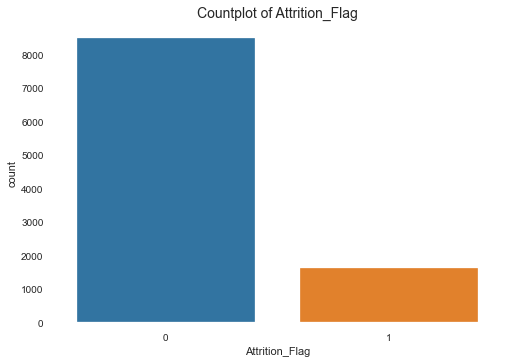

In [52]:
#countplot of our target variable
sns.countplot(x="Attrition_Flag", data=data[target])
plt.title('Countplot of Attrition_Flag', fontsize = 14)
plt.show()
#print(data[target]['Attrition_Flag'].value_counts())

The above chart shows the countplot of our target variable named **Attrition_Flag**. The x-axis represents the two unique values in our target variable where 1 stands for customer who closed their credit card account while 0 means otherwise. The y-axis represents the count of customers falling for each customer type. Based on the above chart, we have 8500 customer who didn't close their acccount and 1627 customers who closed their account. 

#### 5.  Univariate Analysis on Numerical Features
**Univariate Analysis** is the simplest form of analyzing data which concerns only one data to be analyzed at a time. The basic goal is to describe a single feature thru patterns from charting and understanding its summary statistics. 

Here, we'll be investigating the distribution of the top features using a **histogram**. Below is the guide on how histogram is constructed from a data set.

<img src="image/hist.png" width="500" align="left">

<br />
<br />
<br />

**Histogram** provides a visual interpretation of numerical data by indicating the number of data points falling within a range of values called bin. The higher the bar is, the higher the count of data values falling in that bin.


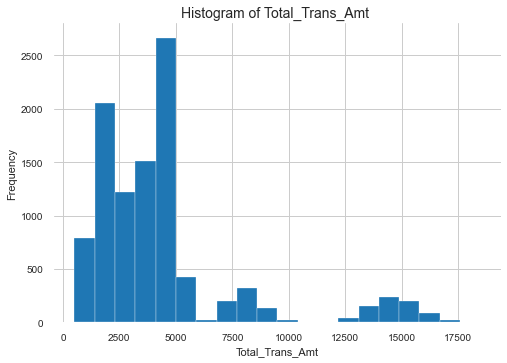

In [41]:
#Total_Trans_Amt
data['Total_Trans_Amt'].hist(bins = 20)
plt.xlabel('Total_Trans_Amt')
plt.ylabel('Frequency')
plt.title('Histogram of Total_Trans_Amt ',fontsize = 14)
plt.show()
#data[['Total_Trans_Amt']].describe().T


The figure above shows the histogram of the feature **Total_Trans_Amt** (Total Transaction Amount). The x-axis represents the grouped values or binned ranges of the numerical feature while the y-axis represents the frequency or the count of customers falling per binned range. As we can see, between 500 and 5000 is where the tallest bars are in which means the most of the customers' total transaction amount is falling in this range. It can also be seen that the the peak is at 5000. 

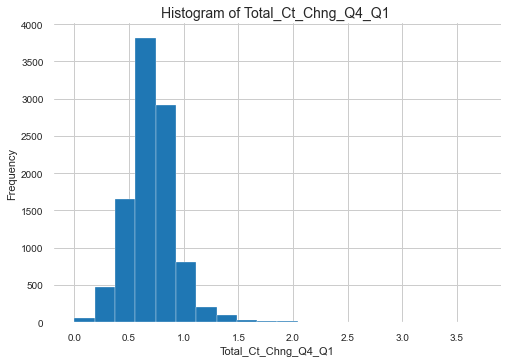

,count,mean,std,min,25%,50%,75%,max
Total_Ct_Chng_Q4_Q1,10127.0,0.712222,0.238086,0.0,0.582,0.702,0.818,3.714


In [43]:
#Total_Ct_Chng_Q4_Q1
data['Total_Ct_Chng_Q4_Q1'].hist(bins = 20)
plt.xlabel('Total_Ct_Chng_Q4_Q1')
plt.ylabel('Frequency')
plt.title('Histogram of Total_Ct_Chng_Q4_Q1 ',fontsize = 14)
plt.show()
data[['Total_Ct_Chng_Q4_Q1']].describe().T

The figure above shows the histogram of the feature **Total_Ct_Chng_Q4_Q1** (Total Transaction Count Change from Q1 to Q4). The x-axis represents the grouped values or binned ranges of the numerical feature while the y-axis represents the frequency or the count of customers falling per binned range. As we can see in the histogram, between 0.5 and 0.8 is where the tallest bars are in which means the total transaction count change from Q1 to Q4 is falling in this range. It can also be seen that the peak is at 0.71 which means that bulk of customers have transaction count from Q1 to Q4 by 30%. The computation of the % decrease is (1 -  mean) x 100.


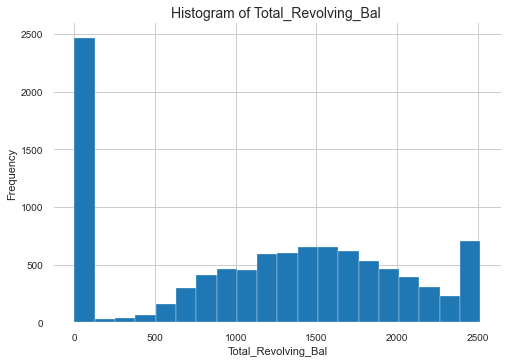

,count,mean,std,min,25%,50%,75%,max
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.0,1276.0,1784.0,2517.0


In [8]:
#Total_Revolving_Bal

data['Total_Revolving_Bal'].hist(bins = 20)
plt.xlabel('Total_Revolving_Bal')
plt.ylabel('Frequency')
plt.title('Histogram of Total_Revolving_Bal ',fontsize = 14)
plt.show()
data[['Total_Revolving_Bal']].describe().T

The chart above shows the histogram of the feature **Total_Revolving_Bal** (Total Revolving Balance). The x-axis represents the grouped values or binned ranges of the numerical feature while the y-axis represents the frequency or the count of customers falling per binned range.  It can be seen that the peak is at 0 which means that bulk of customers have a zero revolving balance. For the remainder of the customers having non-zero revolving balance, the center of the bars is around 1500.

#### 6. Bivariate Analysis on Top Features against the Target Variable

**Bivariate analysis** is also another form of quantitative analysis. The basic goal is to describe the relationship of two features thru patterns from charting and conducting statistical tests.

Here we'll be investigating the mean of the top features against the values of our target variable using a barplot. Shown below is how to read the output of a barplot.

<img src="image/barplot.png" width="500" align="left">

<br />
<br />
<br />

A **barplot** is basically used to aggregate the categorical data according to its mean or average. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking the mean per categorical column. This chart is good at easily pinpointing if there's a difference of mean of the unique values of categorical feature.

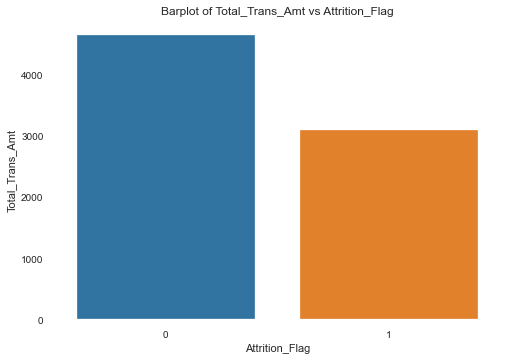

In [57]:
#Barplot
sns.barplot(x="Attrition_Flag", y='Total_Trans_Amt', data=data[numerical+target],ci = 0)
plt.title('Barplot of Total_Trans_Amt vs Attrition_Flag')
plt.show()

The above chart shows the barplot of our target variable named **Attrition_Flag** against **Total_Trans_Amt**. The x-axis represents the two unique values in our target variable where 1 stands for customer who closed their credit card account while 0 means otherwise. The y-axis represents the average total transaction amount. Based on the above chart, it shows that those who closed their account (see orange bar) have lesser average total transaction amount than those who didn't close their account(see blue bar). This makes sense since those who would most likely to close their account would not use their credit card that much. 

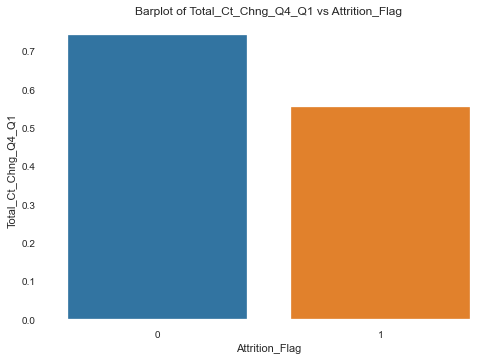

In [10]:
#Barplot
sns.barplot(x="Attrition_Flag", y='Total_Ct_Chng_Q4_Q1', data=data[numerical+target],ci = 0)
plt.title('Barplot of Total_Ct_Chng_Q4_Q1 vs Attrition_Flag')
plt.show()

The above chart shows the barplot of our target variable named **Attrition_Flag** against **Total_Ct_Chng_Q4_Q1**. The x-axis represents the two unique values in our target variable where 1 stands for customer who closed their credit card account while 0 means otherwise. The y-axis represents the average total transaction amount. Based on the above chart, it shows that those who closed their account (see orange bar) have lesser average total transaction from Q4 to Q1 than those who didn't close their account(see blue bar). This makes sense since those who would most likely to close their account would be expected to have a lesser usage of the credit card as their product subscription passes by. 

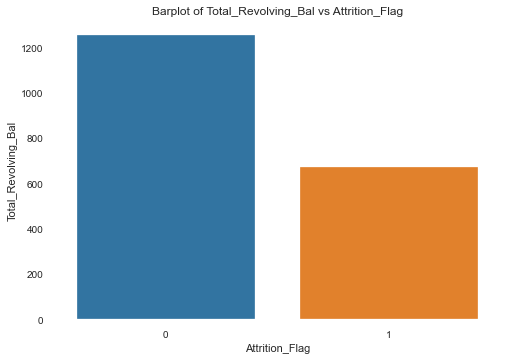

In [11]:
#Barplot
sns.barplot(x="Attrition_Flag", y='Total_Revolving_Bal', data=data[numerical+target],ci = 0)
plt.title('Barplot of Total_Revolving_Bal vs Attrition_Flag')
plt.show()

The above chart shows the barplot of our target variable named **Attrition_Flag** against **Total_Revolving_Bal**. The x-axis represents the two unique values in our target variable where 1 stands for customer who closed their credit card account while 0 means otherwise. The y-axis represents the average total revolving balance. Based on the above chart, it shows that those who closed their account (see orange bar) have lesser average total revolving balance than those who didn't close their account(see blue bar). This makes sense since those who would most likely to close their account are expected to have a lesser to no transaction within their account.

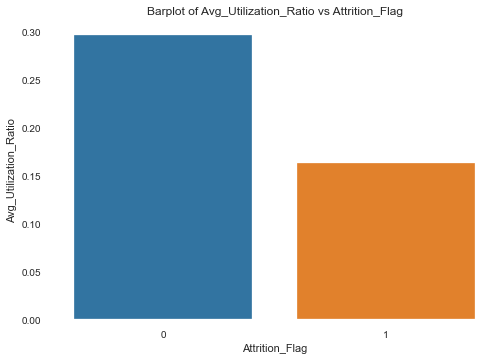

In [12]:
#Barplot
sns.barplot(x="Attrition_Flag", y='Avg_Utilization_Ratio', data=data[numerical+target],ci = 0)
plt.title('Barplot of Avg_Utilization_Ratio vs Attrition_Flag')
plt.show()


The above chart shows the barplot of our target variable named **Attrition_Flag** against **Avg_Utilization_Ratio**. The x-axis represents the two unique values in our target variable where 1 stands for customer who closed their credit card account while 0 means otherwise. The y-axis represents the average total revolving balance. Based on the above chart, it shows that those who closed their account (see orange bar) have lesser average utilization ratio at  than those who didn't close their account(see blue bar). This makes sense since those who would most likely to close their account are expected not to utilize the product.
 

## III. Data Preparation

This is the stage of the project where we would need to do some data cleaning which includes outlier treatment or cleaning of extreme values in the dataset, feature reduction or removal or unnecessary features, feature engineering or transformation of features and feature imputation or replacement of missing values. For the simplicity of the project, we would be considering only the first two.



### A. Outlier Treatment
<img src="image/outliers.png" width="200" align="left">

<br />
<br />

**Outliers** are extreme values that are far different from the overall pattern of our data. This basically shows how stable our dataset is.  Necessary treatment is needed in handling outlier values as it may affect our next steps in this project.
<br />
<br />
<br />
<br />
We'll be using the **winsorization method** as our outlier treatment with a limit threshold of 1%. This means that the 1st and 99th percentile will be the allowable minimum and maximum values per feature, respectively. Any observation values out of the new min-max range will be replaced by the minimum and maximum values.

In [69]:
from collections import Counter
def detect_outliers(data,features, detector = 1):
    '''
    if  detector = 1, it will use the boxplot concept of outlier
    elif detector = 2, it will use th 3 standard deviation from the mean as checker of outlier
    elif detection = 3, winsorization - it will use the 1st and 99th percentile as outlier boundary
    '''
    min_ = []
    max_ = []
    outlier = []
    outlier_indices = []
    features_w_outlier = []
    for c in features:
        #standard deviation
        std = np.std(data[c])
        mean = np.mean(data[c])
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        #winsorization cutting each side
        P1 = np.percentile(data[c], 1)
        P99 = np.percentile(data[c], 99)
        if detector == 1:
        # detect outlier and their indeces
            outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
            # store indeces
            if len(outlier_list_col) >= 0:
                features_w_outlier.append(c)
                outlier_indices.extend(outlier_list_col)
                outlier_boundary ='(' + str(round(Q1 - outlier_step,2))+' , '+ str(round(Q3 + outlier_step,2)) + ')'
                #print(c + ' feature has a stable range at '+ outlier_boundary + ' which equates to ' + str(len(outlier_list_col)) + ' outliers.')
                #print(100*'-')
                min_.append(Q1 - outlier_step)
                max_.append(Q3 + outlier_step)
                outlier.append(len(outlier_list_col))
        elif detector == 2:
            outlier_list_col = data[(data[c] < mean - 3*std) | (data[c] > mean + 3*std)].index
            if len(outlier_list_col) >= 0:
                features_w_outlier.append(c)
                outlier_indices.extend(outlier_list_col)
                outlier_boundary ='(' + str(round(mean - 3*std,2))+' , '+ str(round(mean + 3*std,2)) + ')'
                #print(c + ' feature has a stable range at '+ outlier_boundary + ' which equates to ' + str(len(outlier_list_col)) + ' outliers.')
                #print(100*'-')
                min_.append(mean - 3*std)
                max_.append(mean + 3*std)
                outlier.append(len(outlier_list_col))
        elif detector == 3:
            outlier_list_col = data[(data[c] < P1) | (data[c] > P99)].index
            if len(outlier_list_col) >= 0:
                features_w_outlier.append(c)
                outlier_indices.extend(outlier_list_col)
                outlier_boundary ='(' + str(round(P1,2))+' , '+ str(round(P99,2)) + ')'
                #print(c + ' feature has a stable range at '+ outlier_boundary + ' which equates to ' + str(len(outlier_list_col)) + ' outliers.')
                #print(100*'-')
                min_.append(P1)
                max_.append(P99)
                outlier.append(len(outlier_list_col))
    data = pd.DataFrame({'Minimum': min_, 'Maximum':max_, 'Count_of_Outliers':outlier}, index = features)
    outlier_indices = Counter(outlier_indices)
    outliers = list(i for i, v in outlier_indices.items() if v > 0)
    return data, features_w_outlier

In [71]:
c_outliers, features_w_outliers = detect_outliers(data, numerical, 3)
c_outliers

,Minimum,Maximum,Count_of_Outliers
Customer_Age,27.00000,65.00000,88
Dependent_count,0.00000,5.00000,0
Months_on_book,15.00000,56.00000,86
Total_Relationship_Count,1.00000,6.00000,0
Months_Inactive_12_mon,1.00000,6.00000,29
Contacts_Count_12_mon,0.00000,5.00000,54
Credit_Limit,1438.30000,34516.00000,0
Total_Revolving_Bal,0.00000,2517.00000,0
Avg_Open_To_Buy,210.07800,34294.14000,204
Total_Amt_Chng_Q4_Q1,0.34026,1.51474,204


The table above shows the results of the winsorization method. The first column is the list of our numerical features. The second and third columns named as **Minimum** and **Maximum**, respectively, are the allowable range of values per feature. Lastly, the last column named as **Count_of_Outliers** are the count of data points the are not within the allowable range of values per feature which will then be replaced by the values in the allowable range. Based on the table above, we can observe the following:
 * 10 out 14 features have outliers when winsorization method at 1% limit threshold was used. Hence, processing is needed on these features prior usage in the succeeding steps of the model development.
 * Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 features have the highest count of outliers having around 200 apiece.

In [15]:
#winsorization method
data_clean = data[numerical].copy()
value_limits = {}
for i in numerical:
    lower = np.percentile(data[i],1) #1st Percentile - if x < 1P, 1P
    upper = np.percentile(data[i],99) #99th Percentile - if x > 99P, 99P
    #print(i + "-("+str(round(lower,2))+", "+str(round(upper,2))+ ")")
    value_limits[i] = (lower,upper)
    data_clean[i] = data_clean[i].apply(lambda x: lower if x < lower else (upper if x > upper else x))

The above code basically did the following:
 * The winsorization method was applied to our dataset at limit threshold 1%. This means that the 1st and 99th percentile will be the allowable minimum and maximum values per feature, respectively. Any observation values out of the new min-max range was replaced by the allowed minimum and maximum values.
 * It also created a dictionary variable named **value_limits** where the minimum and maximum range of each feature was saved. This will be saved later for reference in the deployment stage.

In [16]:
#winsorization method checker
i = 0
count = 0
for x in numerical:
    
    if (data_clean[x].min() == value_limits[x][0]) & (data_clean[x].max()==value_limits[x][1]):
        count += 1
    #else:    
        #print(x+ ": not same!")
        #print(str(data_clean[x].min())+ "vs" + str( value_limits[x][0]))
        #print(str(data_clean[x].max())+ "vs" + str( value_limits[x][1]))
    i += 1
if count == len(numerical):
    print("Result: Winsorization method is successfully applied to the data.")
else:
    print("Result: Winsorization method is not successfully applied to the data.")

Result: Winsorization method is successfully applied to the data.


The above code basically checks if the new minimum and maximum values of each feature matches the saved min-max range in *value_limits* dictionary. As seen in the results, Winsorization method is successfully applied to the data.. Hence, we're done with the outlier treatment.

### B. Feature Reduction in Avoidance of Multicollinearity


<img src="image/correlation.png" width="600" align="left">

<br />
<br />
<br />

**Correlation** is the association between variables and it tells us the measure of the extent to which two variables are related to each other. Shown on the figure on the side are the sample of correlations. Two variables can have **positive** (change in one variable causes change in another variable in the same direction), **negative** (change in one variable causes change in another variable in the opposite direction), or **no correlation**. 

<br />
<br />

Next to define is **multicollinearity** which is the presence of high correlations between two or more independent variables or features (predictors). It is basically a phenomenon where independent variables are correlated be it positive or negative. This is something that we want to avoid in our set of features. Hence, feature reduction will be taken place. 

<br />


<img src="image/cormat.png" width="450" align="left">
<br />

To check if there are features in our dataset that are correlated, we'll be using a **correlation plot matrix.** Example is shown on the side image.  As we can see, the plot has the same set of values on x-axis and y-axis. These are the numerical features for multicollinearity checking. The correlation calculation is iterative on all the combination of feature pairing. Highlighted in yellow box is an example of correlation result of the two features. In this case, the V2a and V2b features have a correlation coefficient at 0.34 which is relatively low since it's close to zero.

Once multicollinearity is observed on some feature pairings, it is best practice to remove one of the correlated feature since it reduces the precision of the estimate coefficients, which weakens the statistical power of the model. For this project, **0.7** will be the threshold for considering highly correlated features. Take note that the absolute value of the correlation coefficient is compared and should be less than the set threshold.

In [17]:
def correlation(dataset, threshold):
    'outputs the features with high correlation with other features at a set threshold.'
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
def plot_corr(data):
    'outputs the heatmap  of correlation'
    corr = data.corr()
    sns.heatmap(corr, cmap="Blues", annot=True)
    plt.title('Correlation Plot Matrix', fontsize = 15)
    plt.show()

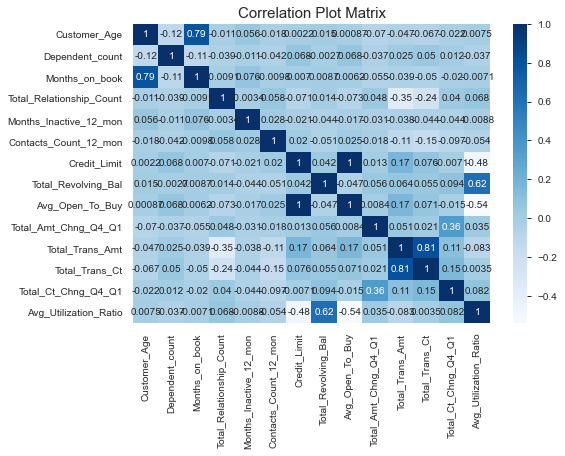

In [18]:
plot_corr(data_clean)

The figure above shows the correlation plot matrix using the numerical features. The x-axis and y-axis which both contain the list of numerical features are identical in terms content and ordering. The intersection of x-axis and y axis pertains to one combination of two numerical features. The number ranging from -1 to 1 is the correlation value/coefficient of the two features which signifies how related the two features are. The darker the blue, the higher the correlation value which means that there's higher association of the two features. This plot will be used to manually check if there are features that are highly correlated with one another. Take note that we'll be using the threshold 0.7. Meaning, feature pairing having a correlation coefficient greater than 0.7 or lower than -0.7 will be part of the list of features for deletion. Based on the correlation plot above, the following are the highlights:
 * Months on Book and Customer Age are highly correlated at 0.79.
 * Total_Trans_Ct and Total_Trans_Amt are highly correlated at 0.81.
 * Avg_Open_To_Buy and Credit_Limit are highly correlated at 1.

In [19]:
corr_feature = correlation(data_clean, 0.7) #0.7 is the cutoff
print('features deleted:', corr_feature)
for k in corr_feature:
    value_limits.pop(k, None)
data_clean.drop(corr_feature, axis = 1, inplace= True)
data.drop(corr_feature, axis = 1, inplace= True)

features deleted: {'Avg_Open_To_Buy', 'Total_Trans_Ct', 'Months_on_book'}


The code above removes the multicollinearity within our dataset by initially checking the correlation of each feature pairing. Should the absolute value of the correlation coefficient is greater our threshold at 0.7, it will remove one of the features in each combination/pairing. Lastly, it will output the list of features deleted in the dataset. Below is the result of the code:
* As expected, the code spotted the 3 feature pairings and then removed the 'Total_Trans_Ct', 'Months_on_book', 'Avg_Open_To_Buy'.

In [20]:
#check correlation
corr_feature_x = correlation(data_clean, 0.7)
print('features for deletion:', corr_feature_x)

features for deletion: set()


After removal, we ran again the code to make sure that there's no multicollinearity existing in our features. The code resulted to no features deleted. Hence, we have reduced our dataset to 11 features. This time we can consider our data as clean and ready for the next step which is the train test data split.

### C.  Train Test Split of Data


<img src="image/data.png" width="400" align="left">
<br />

After making sure that our dataset is clean, the next step is the **Train Test Split of Data**. As shown in the image on the side, the process is basically splitting the entire dataset into two sets at a certain proportion which is usually at 4:1 ratio. The two sets are namely Train and Test data. The rationale here is we want to separate the dataset that we'll be using to train and test our model to be built. We fit or train our model on the train data set and we want to test the performance of our model on the test data set. Test data set is the performance-teller since it's the set of observations not seen by the model. 

Here, we'll be considering the **4:1 ratio** of Train-Test Split.

In [22]:
from sklearn.model_selection import train_test_split
numerical_update = [x for x in numerical if x not in corr_feature]
y = data['Attrition_Flag'].copy()
X_c = data_clean
X = data[numerical_update].copy()
#clean data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y, test_size = 0.2, random_state = 27)

The code above basically did the splitting of our dataset at 4:1 ratio. Input features are saved in **X_train_c, X_test_c** and target feature are saved in **y_train_c and y_test_c**. 

In [84]:
#check dimension of training and test sets
print('X_train: ',X_train_c.shape)
print('y_train: ',y_train_c.shape)
print('X_test: ',X_test_c.shape)
print('y_test: ',y_test_c.shape)

X_train:  (8101, 11)
y_train:  (8101,)
X_test:  (2026, 11)
y_test:  (2026,)


The output above enclosed in parenthesis *(1st, 2nd)* is the dimension of the given data where the 1st and 2nd elements represent the count of rows and columns, respectively. Note that if the value is blank, it means 1 row or column. Above are the dimension of the 4 variables the we'll be using in the next steps. We just want to check if the count of rows and columns are correct after splitting. Following the 4:1 ratio,  the count of our train and test data are consistently 8101 and 2026 observations, respectively.

## IV. Modelling

### A. Pipeline Creation (Feature Scaling and Model Fitting)


<img src="image/pipeline.png" width="700" align="center">




As shown in the image above, pipeline is used to automate the machine learning workflows thru a linear sequence of data transformation. In this project, the steps covered are feature scaling and machine learning algorithm. Basically, its input is the clean data while its output is the prediction outputted by model built in the last step. Take note that in initializing the pipeline, we need to fit the training data set into the pipeline.

**For the first step of the pipeline, why do we need to scale our data before fitting to a machine learning algorithm?**

Given that our numerical features have different ranges, it is necessary to scale our features to standardize our data to a fixed range. This is beneficial since most machine learning algorithms are gradient descent-based (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) where they are known to be very sensitive to the range of the data points. Hence, scaling to a fixed range will be of help so features will have same value ranges for comparison.

We'll be using the **MinMaxScaler or Normalization** feature scaling method to convert the values to a fixed of range from 0 to 1. This is because our data distribution doesn't follow a normal distribution.
<br />
<br />
**For the last step of the pipeline, the scaled data will be fitted to the ML algorithm which outputs a model that we can use for prediction for new data set. We'll be using the Logistic Regression and Random Forest Classifier in this project.**

**Logistic Regression** is a classification machine learning algorithm used to predict the relationship between the target variable (Y) and the independent variables/features (X), where the former is binary in nature. Example usage of this algorithm is when we have to predict if a student passes or fails in an exam when the number of hours spent studying is given as a feature, the response variable has two values, pass and fail.
<br />
<br />
**Random Forest Classifier** is also a classification machine learning algorithm used to predict a binary target variable using set of features (X). This algorithm combines multiple decision trees into a single model. The idea is it considers the binary prediction of all the decision trees by using the most common prediction as the final prediction of the model.


In [24]:
from sklearn.preprocessing import MinMaxScaler #Normalization
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, r2_score, plot_confusion_matrix

In [25]:
#Setting up of each step of the pipeline
lr_pipeline = Pipeline([('Normalizer', MinMaxScaler()), ('Logistic Regression', LogisticRegression())])
rfc_pipeline = Pipeline([('Normalizer', MinMaxScaler()), ('Random Forest Classifier', RandomForestClassifier())])

#Fitting the pipeline to our training data set
pmodel_lr = lr_pipeline.fit(X_train_c,y_train_c)
pmodel_rfc = rfc_pipeline.fit(X_train_c,y_train_c)

We have created two pipelines **pmodel_lr** and **pmodel_rfc** for **Logistic Regression** and **Random Forest Classifier** algorithms, respectively. We'll be checking later the performance of the fitted models using different metrics.

### B.  Feature Selection 

**Feature Selection** is the process where we select those features which contribute most to your target/output variable. Having irrelevant features in our data can decrease the accuracy of the models and make our model learn based on irrelevant features. While there's a lot of methods can be used, we'll be looking at **Random Forest Feature Importance** for this.


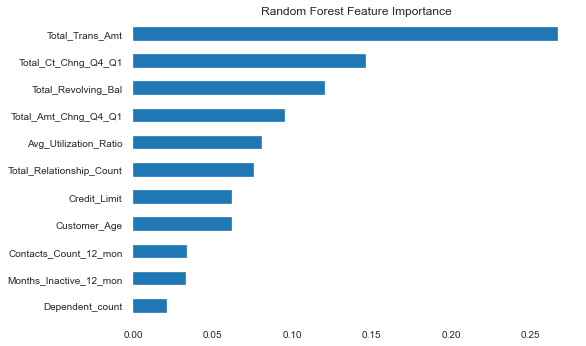

In [26]:
# Random Forest

#Feature Importance
feat_importances = pd.Series(pmodel_rfc['Random Forest Classifier'].feature_importances_, index = X.columns)
feat_importances.nsmallest(len(X.columns)).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

The figure above shows the horizontal bar chart of the feature importance output of Random Forest algorithm. On the y-axis are the 11 features we have while on the x-axis are the feature importance values. The value in blue bars can be interpreted as the amount of variation of target variable explained by the feature. Hence, the relationship is the higher the feature importance value, the more important the feature is.  

Based on the feature importance provided by Random Forest, the top 3 features are Total_Trans_Amt, Total_Ct_Chng_Q4_Q1 and Total_Revolving_Bal. Take note that there's no feature having a very low figure close to 0. Lowest feature importance is *Dependent_count* at 2%. From here, **all features** will be considered in the modelling.

## V. Evaluation

### A.  Calculate Percent Correct Classification (PCC)

In [27]:
def calc_PCC(data):
    target_1 = data.value_counts()[1]
    target_0 = data.value_counts()[0]
    PCC = round(((target_1/(target_1+target_0))**2 +(target_0/(target_1+target_0))**2)*100,2)
    return PCC # natural occurence of accuracy, current performance without the model

In [28]:
PCC = calc_PCC(data['Attrition_Flag'])
print('Current Accuracy: ',PCC)
print('Target Accuracy: ',PCC*1.25)

Current Accuracy:  73.03
Target Accuracy:  91.2875


**Percent Correct Classification (PCC)** measures overall accuracy without the help of a classification model yet. The rule thumb is the model should improve the current accuracy by 25%, meaning 91.3% will be the target accuracy of the model that we'll be building. Take note that it will just be a target but not a strict accuracy value to be achieved.

### B. Model Peformance

Evaluating the performance of a machine learning model is one of the important steps in model development. Basically, we want to know how accurate our model is in predicting. We'll be using different metrics to gauge how our predictive model is performing. 

<img src="image/confusion.png" width="800" align="center">

Shown above is an example of a **confusion matrix.** Basically, it is a table used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In our example, we have a total of 100 customers where 62 of which are attrited or did close their account while the remaining 38 customers did not. The values in each of the 4 quadrants represent the count of customers that are correctly predicted as attritted and non-attritted (see green boxes) and incorrectly predicted as attritted and non-attritted (see red boxes). Simply, the model having lesser values or closer to zero in the red boxes are better and is a sign of a better predictive model.

There are different metrics we can look at using the values in the confusion matrix. Below are those metrics:

1. **Accuracy** - is the proportion of customers who are attritted and aren't attritted that are predicted correctly by the model. As we can see above, it is the total values in green boxes over the total values in all boxes.

2. **Recall** - is the proportion of attritted customers that are predicted correctly as attrited customers by the model. As we can see above, it is value of the green box in the first column over the total values in all boxes in the first column.

3. **Precision** - is the proportion of predicted attrited customers that are correctly attritted customers in its actual values.  As we can see above, it is value of the green box in the first row over the total values in all boxes in the first row.

4. **Event Rate** - is the proportion of customers that are predicted correctly as attrited customers by the model. As we can see above, it is the value of the green box in the first column/row over the total values in all boxes.


In terms of metrics importance hierarchy based on the nature of our problem, we most value **Recall** then **Accuracy**  and **Precision**. We highly value Recall since we want our model to correctly spot those customers who are most likely to close their credit card account.

Also, to assess how the metrics behave, we'll be using the **predict.proba** method of the model which outputs the probability value instead of the **predict** method which uses 0.5 threshold. Using the probability, we'll be adjusting the threshold from 0 to 1 at a step of 0.02 and observe how the metrics behave.

**Threshold** : [0, 0.02, 0.04, 0.6, . . . , 0.94, 0.96, 0.98, 1.0]

We need to find the sweet spot or best threshold where **Recall is maximized but Accuracy and Precision are not  compromised.**

Below are the two fitted models:
1. **pmodel_lr['Logistic Regression']** : Logistic Regression
2. **pmodel_rfc['Random Forest Classifier']** : Random Forest Classifier



In [29]:
def plot_metrics(model, X_train, y_train, show_chart = True, cutoff = 0.5):
    threshold = np.arange(0.00,1.02,0.02)
    precision = []
    recall = []
    accuracy = []
    event_rate = []
    data_result = pd.DataFrame()
    data_result['y'] = y_train
    if isinstance(y_train, np.ndarray):
        y_train = pd.Series(y_train)
    y_pred_proba = model.predict_proba(X_train)
    data_result['y_pred_proba'] = y_pred_proba[:,1]
    for i in threshold:
        y_pred = pd.Series(y_pred_proba[:,1]).apply(lambda x: 1 if x >= i else 0)
        precision.append(precision_score(y_train,y_pred))
        recall.append(recall_score(y_train,y_pred))
        accuracy.append(accuracy_score(y_train,y_pred))
        event_rate.append((y_train.reset_index(drop= True)*y_pred).sum()/y_train.shape[0])
    data = pd.DataFrame({'accuracy': accuracy, 'precision': precision, 'recall': recall, 'event_rate': event_rate})
    data.set_index(threshold, inplace = True)
    if show_chart is True:
        #Plot the data in a line chart
        
        data.plot(kind = 'line')
        plt.axvspan(cutoff-0.001,cutoff+0.001 , color='gray', alpha=0.5)
        plt.text(cutoff+0.01,0.95,'cutoff: '+str(cutoff),size=12)
        plt.xlabel('Threshold', fontsize=10)
        plt.ylabel('Performance', fontsize=10)
        plt.title('Model Metrics Performance', fontsize=15 )
        plt.show()
    return data, data_result

def plot_result_hist(model_lr,X_train_c, y_train_c, cutoff = 0.5):
    x,y = plot_metrics(model_lr, X_train_c, y_train_c, False)
    y_axis,x_axis,_ = plt.hist(y['y_pred_proba'], bins = 30)
    plt.title('Model Predicted Probability Distribution', fontsize = 15)
    #table = r'''\begin{tabular}{ c | c } & Metric & Performance \\\hline 'Accuracy' & 11  \\\hline row2 & 21  \\\hline  row3 & 31  \\\hline  row4 & 31\end{tabular}'''
    plt.text(0.7,max(y_axis)-(max(y_axis)/15),'Accuracy: '+str(round(x.loc[cutoff][0],3)),size=12)
    plt.text(0.7,max(y_axis)-2*(max(y_axis)/15),'Precision: '+str(round(x.loc[cutoff][1],3)),size=12)
    plt.text(0.7,max(y_axis)-3*(max(y_axis)/15),'Recall: '+ str(round(x.loc[cutoff][2],3)),size=12)
    plt.text(0.7,max(y_axis)-4*(max(y_axis)/15),'Event Rate: '+ str(round(x.loc[cutoff][3],3)),size=12)
    plt.axvspan(cutoff-0.001,cutoff+0.001 , color='gray', alpha=0.5)
    plt.text(cutoff+0.01,max(y_axis)-2*(max(y_axis)/15),'cutoff: '+str(cutoff),size=12)
    plt.xlabel('Model Predicted Probability')
    plt.ylabel('Count')
    plt.show()
    


#### 1. Logistic Regression

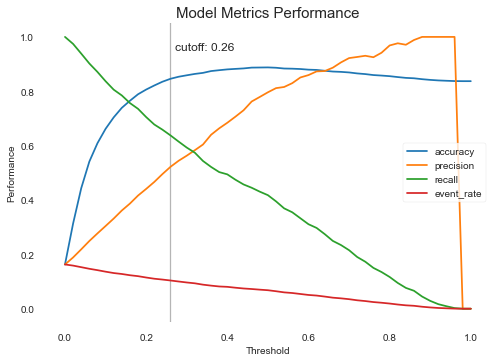

,accuracy,precision,recall,event_rate
0.26,0.845945,0.522036,0.637604,0.103814


In [30]:
data_list = {'Train':(X_train_c,y_train_c),'Test':(X_test_c,y_test_c),'Whole':(np.concatenate((X_train_c, X_test_c), axis=0),np.concatenate((y_train_c, y_test_c),axis = 0))}
_,__ = plot_metrics(pmodel_lr,data_list['Train'][0],data_list['Train'][1], cutoff = 0.26)
pd.DataFrame(_.loc[0.26]).T

The figure above shows the line chart of the performance of the 4 metrics (*Recall, Accuracy, Precision and Event Rate*) on the **Train Data Set**. The x-axis is the threshold from 0 to 1 at a step of 0.02 while the y-axis is the metrics performance result ranging as well from 0 to 1. Take note that the higher the value in the performance (y-axis), the better. Based on how the metrics behaved in the above figure, the following are the highlights:
* Recall in green line and Event rate in red line are having consistent downward or decreasing trend as we  increase the threshold values in x-axis. This shows that there is inversely proportional relationship which means the higher the threshold, the lower the Recall and Event Rate we can get.
* Accuracy in blue line has increased or had a big jump in its performance starting from 0 to 0.2 threshold. However, starting from 0.2 threshold, the performance has plateaud between 0.80 to 0.85.
* On the contrary of Recall and Event Rate, Precision in orange line is consistenly has an upward trend as we move our threshold from 0 to 0.96 then it dropped to 0 performance at 0.98 and 1.0 threshold. This shows that the relationship is directly proportional which means the higher the threshold, the higher the the precision we can get which holds only up until 0.96 threshold.
* We chose the **0.26** (see the black vertical line) as the sweet spot or best threshold  where **Recall is 0.638, Accuracy is 0.846, Precision is 0.522 and Event rate is 0.104**. This is the best spot since Recall is high at this threshold while Accuracy and Precision are also relatively high and not compromised.

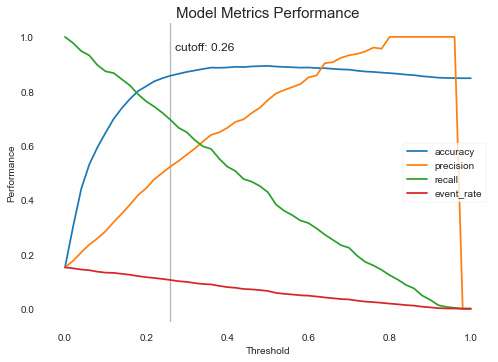

,accuracy,precision,recall,event_rate
0.26,0.857354,0.523227,0.694805,0.105627


In [74]:
_,__ = plot_metrics(pmodel_lr,data_list['Test'][0],data_list['Test'][1], cutoff = 0.26)
pd.DataFrame(_.loc[0.26]).T



The figure above shows the line chart of the performance of the 4 metrics (*Recall, Accuracy, Precision and Event Rate*) on the **Test Data Set**. The x-axis is the threshold from 0 to 1 at a step of 0.02 while the y-axis is the metrics performance result ranging as well from 0 to 1. Take note that higher the value in the performance (y-axis), the better. Based on how the metrics behaved in the above figure, the following are the highlights:
* Same in the Training data set, Recall in green line and Event rate in red line are decreasing consistently as we increase our threshold from 0 to 1. This means that the relationship is inversely proportional or the higher the threshold, the lower the Recall and Event Rate we can get.
* Same in the Training data set, Accuracy in blue line has increased or had a big jump in its performance starting from 0 to 0.2 threshold. However, starting at 0.2 threshold, the performance has also plateaud at around 0.80 to 0.85.
* Same in the Training data set, on the contrary of Recall and Event Rate, Precision in orange line is consistenly increasing as we move our threshold from 0 to 0.96 then it dropped to 0 performance at 0.98 and 1.0 threshold. This means that the relationship is directly proportional the higher the threshold, the higher the the precision we can get which holds only up until 0.96 threshold.
* Overall, it can be observed that the 4 metrics behaved the same as the training data set's performance. This could be a sign that our model is not overfitting and stable even to new set of data.
* Choosing the same **0.26** threshold,  **Recall is 0.695, Accuracy is 0.857, Precision is 0.523, and Event Rate is 0.106** which are close to performance results in training data.  


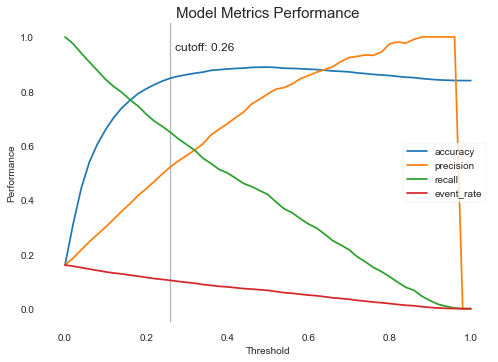

,accuracy,precision,recall,event_rate
0.26,0.848228,0.522277,0.648433,0.104177


In [32]:
_,__ = plot_metrics(pmodel_lr,data_list['Whole'][0],data_list['Whole'][1], cutoff = 0.26)
pd.DataFrame(_.loc[0.26]).T


The figure above shows the line chart of the performance of the 4 metrics (*Recall, Accuracy, Precision and Event Rate*) on the **Whole Data Set**. The x-axis is the threshold from 0 to 1 at a step of 0.02 while the y-axis is the metrics performance result ranging as well from 0 to 1. Take note that the higher the value in the performance (y-axis), the better. Based on how the metrics behaved in the above figure, the following are the highlights:
* Same in both Training and Test data set, Recall in green line and Event rate in red line are decreasing consistently as we increase our threshold from 0 to 1. This shows that the relationship is inversely proportional or the higher the threshold, the lower the Recall and Event Rate we can get.
* Same in both the splitted data set, Accuracy in blue line has increased or had a big jump in its performance starting from 0 to 0.2 threshold. However, starting at 0.2 threshold, the performance has also plateaud at around 0.80 to 0.85.
* Same in both the splitted data set, on the contrary of Recall and Event Rate, Precision in orange line is consistenly increasing as we move our threshold from 0 to 0.96 then it dropped to 0 performance at 0.98 and 1.0 threshold. This means that the relationship is directly proportional the higher the threshold, the higher the the precision we can get which holds only up until 0.96 threshold.
* Overall, it can be observed that the 4 metrics behaved the same as the training and test data set's performances.
* Recall, Accuracy, Event Rate and Precision behaved the same across the 3 diffent datasets as we increased the threshold.
* Choosing the same **0.26** threshold,  **Recall is 0.648, Accuracy is 0.848, Precision is 0.522 and Event Rate is 0.104**. which are not far from the training and test data's values.  


#### 2. Random Forest

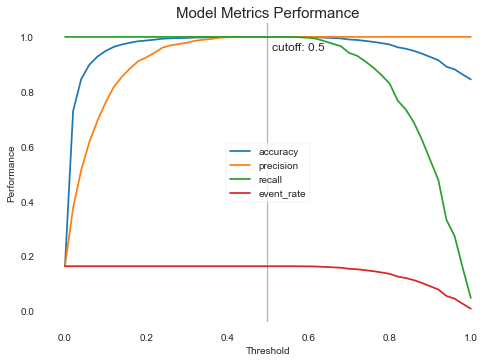

,accuracy,precision,recall,event_rate
0.5,1.0,1.0,1.0,0.162819


In [76]:
#Random Forest
_,__ = plot_metrics(pmodel_rfc,data_list['Train'][0],data_list['Train'][1])
pd.DataFrame(_.loc[0.5]).T


The figure above shows the line chart of the performance of the 4 metrics (*Recall, Accuracy, Precision and Event Rate*) on the **Training Data Set**. The x-axis is the threshold from 0 to 1 at a step of 0.02 while the y-axis is the metrics performance result ranging as well from 0 to 1. Take note that the higher the value in the performance (y-axis), the better. Based on how the metrics behaved in the above figure, the following are the highlights:
* Recall in green line and Event rate in red line is at its perfect score from 0 to 0.6 threshold. However, starting 0.62 threshold, their performances consistenly decreased as it moves towards the 1.0 threshold.  
* Accuracy in blue line has increased its performance from 0 to 0.10 threshold. Its performance is consistenly high at above 0.95 within the threshold range of 0.12 and 0.84. After 0.84 threshold, the performance consistenly descreased to a lowest of 0.845 as it hit the 1.0 threshold.
* Precision in  orange line has consistently increased its performance until 0.42 threshold. It reached the highest at 1.0 and consistenly plateaud there as the highest threshold was reached.
* This seems to be a perfect model if we'll be considering 0.5 threshold (see the black vertical line for reference). However, we need to check if the model using the test data will perform the same way or not. This will give us the sign of overfitting the training data which means the model just memorized the training data.

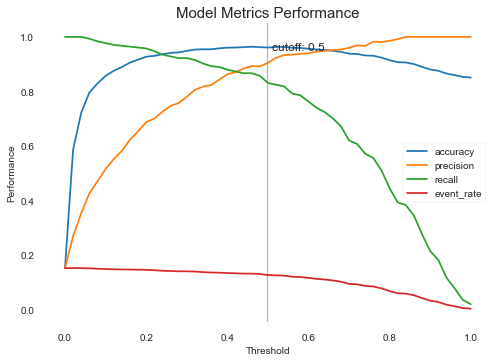

,accuracy,precision,recall,event_rate
0.5,0.961007,0.904594,0.831169,0.126357


In [78]:
#Random Forest
_,__ = plot_metrics(pmodel_rfc,data_list['Test'][0],data_list['Test'][1])
pd.DataFrame(_.loc[0.5]).T
#display(_)

The figure above shows the line chart of the performance of the 4 metrics (*Recall, Accuracy, Precision and Event Rate*) on the **Test Data Set**. The x-axis is the threshold from 0 to 1 at a step of 0.02 while the y-axis is the metrics performance result ranging as well from 0 to 1. Take note that the higher the value in  the performance is (y-axis), the better. Based on how the metrics behaved in the above figure, the following are the highlights:

* Recall in green line and Event rate in red line consistently have a downward trend which means decreasing performances as we increased our threshold from 0 to 1.  This means that the relationship is inversely proportional or the higher the threshold, the lower the Recall and Event Rate we can get.
* Accuracy in blue line has increased its performance from 0 to 0.28 threshold. Its performance is consistenly high at above 0.95 within the threshold range of 0.30 and 0.64. After 0.64 threshold, the performance consistenly decreased to a lowest of 0.851 as it hit the 1.0 threshold.
* Precision in  orange line has a consistent upward trend until 0.82 threshold. It reached the highest at 1.0 and plateaud there until the 1.0 was reached. This means that the relationship is directly proportional or the higher the threshold, the higher the Precision we can get.
* As compared to the performance of the model on the Training Data Set, the performance is way different. This means there seems to be a sign of overfitting and instability of the model to new data. Hence, hyperparameter tuning is needed. 

For the simplicity of the model, we will not proceed the Random Forest Model to the deployment.

**Decision on Model for Deployment:**
* We'll only consider the Logistic Regression Model for the next step of the project which is the deployment since it's more stable and has no signs of overfitting and underfitting. 

## VI. Deployment

**Deployment** of a machine learning model, known as model deployment, simply means to integrate a machine learning model and integrate it into an existing production environment where it can take in an input data and return an output which is the prediction of the model.
<img src="image/deployment.png" width="700" align="center">

Shown above is the basic workflow how the data is flowing in a machine learning model deployment. Below are the steps:

1. In the first box is the Frontend where the input data will be  coming from. Once the data in JSON format is complete, it will call the API. This is an example of JSON: { 'feature_1': 17, 'feature_2: 35 }. Note that it's almost the same as the Dictionary data type in python.
2. The API made using the Flask library which is placed in the second box will be the one to connect the front end and the last box which is where the pipeline is placed. 
3. Based on the JSON file thrown at the API, be it a single entry or batch/multiple entries, it will transform the input data into an array type. It is because it is the type of data that the pipeline can read.
4. The input features in array will be inputted into the pipeline for prediction.
5. The outputed value of the model from the pipeline will be gotten by the API and then transform it again to JSON format. 
6. The outputted response will finally be thrown back at the Frontend for further processing within the application or webpage.



### A. Model Deployment Preparation

###### Assumptions:
1. Input data for the 11 features is in JSON format.
2. Output data after prediction is JSON as well indicating the predicted probability and the predicted_y that is binary result using 0.26 threshold.
3. Input data can be in single or in batch entries. If in batch, **"/batch"** should be added on the API call and will be directed to its corresponding route.


#### 1. Pickle Creation

**Pickle** library is used in saving the fitted pipeline. This will be used as part of the API that we'll be building.

In [35]:
import pickle as Pickle

#save the model to pickle file
Pickle.dump(pmodel_lr, open('pmodel_lr.pkl','wb'))

#### 2.  Saving of Value Limits
We also saved the **value_limits** variable to a JSON file to save the allowable min-max range of each feature. This will be used as well in the prepocessing within the API as we need to make sure the the input features we'll be within the said range. 

In [36]:
import json
with open('value_limits.json', 'w') as f:
    json.dump(value_limits, f)

#### 3.  Testing of Pickle results

In [37]:
model = Pickle.load(open('pmodel_lr.pkl','rb'))

with open('value_limits.json') as f:
  v_limits = json.load(f)

In [38]:
#single input
model.predict_proba(np.array(X_test_c.loc[7080]).reshape(1,-1))

array([[0.94266222, 0.05733778]])

Here, we just want to read the pickle file and test it out thru prediction using a single input. We can see that the pipeline is successfully saved in the pickle file. Take note that we'll consider the 2nd value of the list as the probability output for the target/output variable. Necessary parsing is needed.

### B. Creation of Flask API
<img src="image/deployment1.png" width="700" align="center">

Shown above is the workflow of our deployment design. Below are the steps:

1. We'll be using Postman, an API client platform, to call our API made using the Flask library. Note that our sample data input in JSON format will be placed in Postman.
2. The Postman will call the API and throw the input data in JSON. Note that there are 2 routes in the API: first is for single input prediction and the second is for multiple predictions. 
3. Once the data is in the API, it will call the preprocessing function to check the values of the input data. If the values are not within the allowable range, it will be replaced and updated accordingly based on the minimum and maximum values. After this, the input data can be marked as clean.
4. Once the data has been cleaned, it will be inputted to the loaded model in the Pickle file for prediction. Note that the output value is probability.
5. Another data processing will be taken place wherein the probability output will be compared to the set threshold which is 0.26. If the value is greater than or equal to 0.26, then the processed prediction will be 1, otherwise, 0. The results will be both saved.
5. The  probability prediction and processed prediction in binary will be gotten by the API and then transform it again to JSON format. 
6. The outputted response will finally be thrown back at the Postman for viewing.

In [79]:
#Here we read again the pickle file and v_limits
import json
model = Pickle.load(open('pmodel_lr.pkl','rb'))

with open('value_limits.json') as f:
  v_limits = json.load(f)

In the assumption that this deployment is placed in a different python file, we still load the **pmodel_lr.pkl** file where the fitted pipeline is saved and **value_limits.json** file where the value limits of our features are saved.

In [80]:
def check_limits(sample,value_limits):
    #sample = json.loads(sample)
    output={}
    for i in value_limits.keys():
        if sample[i] > value_limits[i][1]:
            output[i] = value_limits[i][1]
        elif sample[i] < value_limits[i][0]:
            output[i] = value_limits[i][0]
        else:
            output[i] = sample[i]
    return output, np.array(list(output.values())).reshape(1,-1)

def pipeline_predict(data, value_limits, pipeline, threshold):
    x, y = check_limits(data,value_limits)
    predict_proba = pipeline.predict_proba(y)[0][1]
    if predict_proba >= threshold:
        result = 1
    else: 
        result = 0
    return predict_proba, result

* The **check_limits** function basically does the checking of values of input features if it's within the allowable range from the value limits file. In the case that it's not, it will replace the value accordingly based on the value limits recorded.
* The **pipeline_predict** function makes use of the check_limits for preprocessing, makes use of the pickle file for model prediction of the probability, and lastly, comparison of the outputted probability to the threshold for processed prediction.

In [81]:
from flask import Flask, request, jsonify, render_template
import os
import json

app = Flask(__name__)
@app.route('/', methods=['GET','POST'])
def index():
    data = request.json
    predict_proba, y = pipeline_predict(data, v_limits, model, 0.26)
    result = {'predict_proba':predict_proba, 'predicted_y': y}
    return jsonify(result)

@app.route('/batch/', methods=['GET','POST'])
def index_():
    result = {}
    data = request.json
    for i in data.keys():
        predict_proba, y = pipeline_predict(data[i], v_limits, model, 0.26)
        result_ = {'predict_proba':predict_proba, 'predicted_y': y}
        result[i] = result_
    return jsonify(result) #jsonify(result)
    
if __name__=="__main__":
    app.run(host=os.getenv('IP', '0.0.0.0'),
            port=int(os.getenv('PORT', 5555)), debug = False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5555/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Mar/2021 17:01:07] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:01:17] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:01:25] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:01:32] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:01:42] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:01:56] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:15] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:22] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:26] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:33] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:43] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:02:55] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:03:09] "POST /batch/ HTTP/1.1" 200 -
127.0.0.1 - - [29/Mar/2021 17:03:17] "POST /batch/ HTTP/1.1" 200 -
127.

Above is the code of the API created for our model deployment. Take note that there are two routes available. The **"/"** is for the single input data while the **'/batch/'** is for the multiple input data. Both the **check_limits** and **pipeline_predict** functions are used in the two routes.
<br />
<br />

Below are the sample runs in postman:


**For single prediction:**

<img src="image/single.png" width="700" align="center">
<br />
<br />

The figure above shows how the postman is used to call our API (see first box) and input our data for a single customer (see the middle box). While the processing in the backend, we can still see the result of the prediction in the third box. It can be seen that the predicted probability is 0.00 which is less than 0.26, making the predicted_y equals to 0. Take note the input and output data are both in JSON format.
<br />
<br />
**For batch/multiple prediction:**
<br />
<br />
<img src="image/batch.png" width="700" align="center">
<br />
<br />
The figure above shows how the postman is used to call our API (see first box) and input our data for multiple customer (see the middle box). The API route called is different by adding **batch/** string to the local host. 
While the processing in the backend, we can still see the result of the prediction in the third box for the two customers. It can be seen that the first predicted probability is 0.00 which is less than 0.26, making the predicted_y equals to 0 while the second predicted probability is 0.55 which is greater than 0.24, making the predicted_y equals to 1.

## Recommendation
Aiming to help the bank in identifying the customers who are more likely to close their credit card account, we built and deployed a classification model using Logistic Regression. Sticking only to the goal to come up with a simple yet good performing model that reaches the deployment phase, I came up with the list of recommendation for improvement of this project. Below are the following:

1. The categorical features can be considered in the feature selection.
2. Feature engineering or features interaction can be explored as well.
3. Different outlier treatment or tigher limit threshold in winsorization method.
4. Consider other machine learning algorithm like KNN, SVM, Decision Trees in building the model.
5. Given the overfitting result of our random forest model, hyperparameter tuning can be done.
6. For the deployment, an html page can be built for a better visual in the model usage.

## References

1. Business scenario and data:  https://www.kaggle.com/sakshigoyal7/credit-card-customers
2. Images: https://images.google.com
3. Postman:  https://www.postman.com/downloads/
4. Deployment Tutorial: https://www.youtube.com/watch?v=UbCWoMf80PY&t=495s
